<a href="https://colab.research.google.com/github/ronsupreme/BaiTH1/blob/main/BaiTH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Bài 1 (3 điểm): Sử dụng Numpy xây dựng phương pháp hồi quy tuyến tính và tiến
hành huấn luyện trên bộ dữ liệu Forest Fires (link:
https://archive.ics.uci.edu/static/public/162/forest+fires.zip).**

In [10]:
# Read data
file_path = "/content/forestfires.csv"
data = pd.read_csv(file_path)
print("Data:\n", data.head())

# Drop unnecessary columns (categorical)
data = data.drop(columns=["month", "day"])

# Convert dataframe to numpy arrays
X = data.drop(columns=["area"]).values  # Input
y = data["area"].values.reshape(-1, 1)  # Target

# Add bias
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculate (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict and evaluate
y_pred = X @ theta
mse = np.mean((y - y_pred) ** 2)

print("Regression coefficients:\n", theta)
print("MSE:\n", mse)


Data:
    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Regression coefficients:
 [[-6.36931477e+00]
 [ 1.90794524e+00]
 [ 5.69180991e-01]
 [-3.91995160e-02]
 [ 7.73345196e-02]
 [-3.29461471e-03]
 [-7.13739029e-01]
 [ 8.00212731e-01]
 [-2.30644773e-01]
 [ 1.55743147e+00]
 [-3.40403700e+00]]
MSE:
 3956.7092182333945


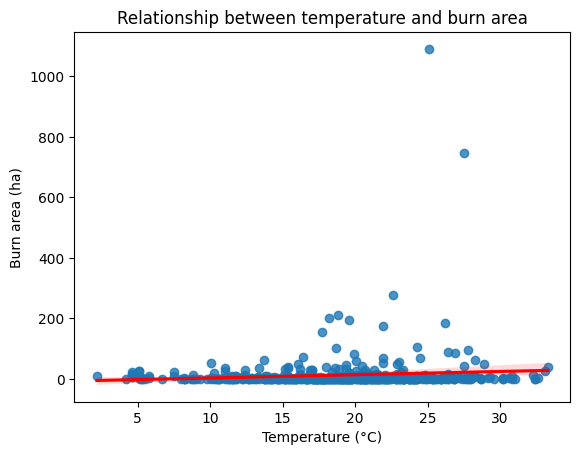

In [11]:
sns.regplot(x='temp', y='area', data=data, line_kws={'color':'red'})
plt.title('Relationship between temperature and burn area')
plt.xlabel('Temperature (°C)')
plt.ylabel('Burn area (ha)')
plt.show()

**Bài 2 (3 điểm): Chuẩn hoá dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1.
So sánh kết quả của mô hình sau khi được huấn luyện với dữ liệu đã được chuẩn hoá
so với kết quả trong bài 1.**

In [12]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, 1:])  # No standardization bias
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))  # Add bias

# Train model
theta_scaled = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y
y_pred_scaled = X_scaled @ theta_scaled

# Compare réult
mse_scaled = np.mean((y - y_pred_scaled) ** 2)

print("Regression coefficients after standardization:\n", theta_scaled)
print("MSE after standardization:", mse_scaled)


Regression coefficients after standardization:
 [[12.84729207]
 [ 4.41028992]
 [ 0.69935859]
 [-0.2161763 ]
 [ 4.94821148]
 [-0.81649173]
 [-3.25112802]
 [ 4.6420396 ]
 [-3.75989744]
 [ 2.78767621]
 [-1.006481  ]]
MSE after standardization: 3956.7092182333945


*Việc chuẩn hóa dữ liệu (standardization) trong bai toán này không làm thay đổi mối quan hệ tuyến tính giữa các biến nên MSE cũng không thay đổi. Hồi quy tuyến tính là bất biến dưới phép biến đổi affine*

**Bài 3 (2 điểm): Tiến hành kỹ thuật Feature Engineering, tìm ra các thuộc tính có tính
chất colinearity (linearly dependent). Huấn luyện lại phương pháp hồi quy tuyến tính
với bộ dữ liệu chỉ giữ lại các thuộc tính uncorrelated.**

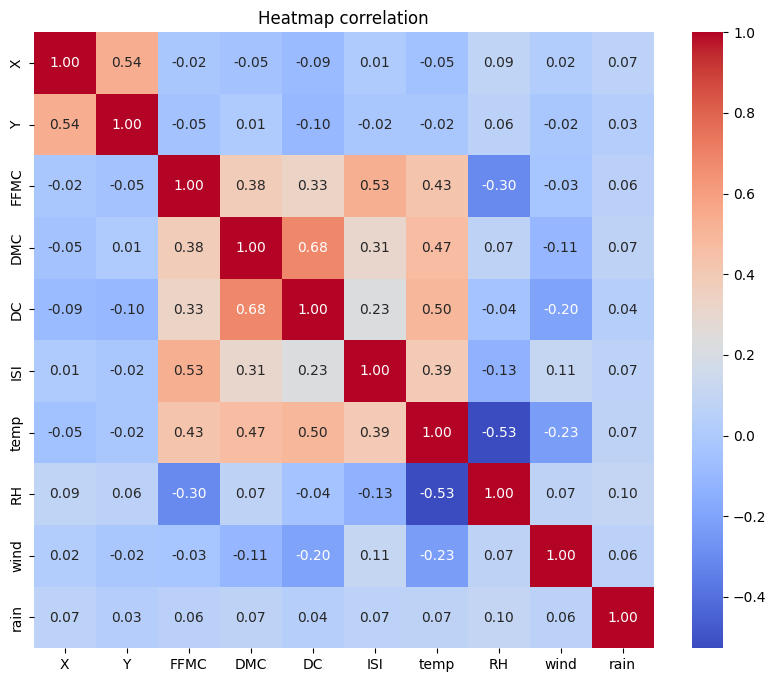

High correlation feature: {'DC'}
MSE after removed colinear: 3957.022802802404


In [21]:
# Correlation matrix
correlation_matrix = pd.DataFrame(X[:, 1:], columns=data.drop(columns=["area"]).columns).corr()

# Heatmap to observe correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap correlation")
plt.show()

# Eliminate pairs of variables that are highly correlated (absolute value > 0.9)
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            high_corr_features.add(correlation_matrix.columns[i])

# Hold uncorrelated
X_filtered = data.drop(columns=["area"] + list(high_corr_features)).values
X_filtered = np.hstack((np.ones((X_filtered.shape[0], 1)), X_filtered))

# Retrain modle
theta_filtered = np.linalg.inv(X_filtered.T @ X_filtered) @ X_filtered.T @ y
y_pred_filtered = X_filtered @ theta_filtered

# Compare result
mse_filtered = np.mean((y - y_pred_filtered) ** 2)

print("High correlation feature:", high_corr_features)
print("MSE after removed colinear:", mse_filtered)


*Chọn ngưỡng 0,6 nên loại bỏ feature DC. MSE tăng nhẹ sau khi loại bỏ feature, có thể do mất thông tin từ các feature bị loại, điều này giúp giảm overfitting và cải thiện khả năng tổng quát hóa.*

**Bài 4 (2 điểm): Sử dụng thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại
phương pháp Linear Regression.**

In [14]:
# Init Sklearn
model = LinearRegression()
model.fit(X[:, 1:], y)

# Predict and evaluate
y_pred_sklearn = model.predict(X[:, 1:])
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("Regression coeffiencts Sklearn:\n", model.coef_)
print("Intercept:", model.intercept_)
print("MSE Sklearn:", mse_sklearn)


Regression coeffiencts Sklearn:
 [[ 1.90794524e+00  5.69180991e-01 -3.91995160e-02  7.73345196e-02
  -3.29461471e-03 -7.13739029e-01  8.00212731e-01 -2.30644773e-01
   1.55743147e+00 -3.40403700e+00]]
Intercept: [-6.36931477]
MSE Sklearn: 3956.709218233395
